## **FRUIT CLASSIFICATION USING K - NEAREST NEIGHBOURS (KNN) ALGORITHM**

###**Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split as TTS
from sklearn.preprocessing import MinMaxScaler as MMS

#####*Importing Fruit Dataset*

In [2]:
data = pd.read_csv('/content/fruits.csv')

pred = dict(zip(data.fruit_label.unique(), data.fruit_name.unique()))   
pred

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

### **Knowing the dataset**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fruit_label  59 non-null     int64  
 1   fruit_name   59 non-null     object 
 2   mass         59 non-null     int64  
 3   width        59 non-null     float64
 4   height       59 non-null     float64
 5   color_score  59 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.9+ KB


In [4]:
data.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


##### *Checking for null values*

In [5]:
data.isnull().sum()

fruit_label    0
fruit_name     0
mass           0
width          0
height         0
color_score    0
dtype: int64

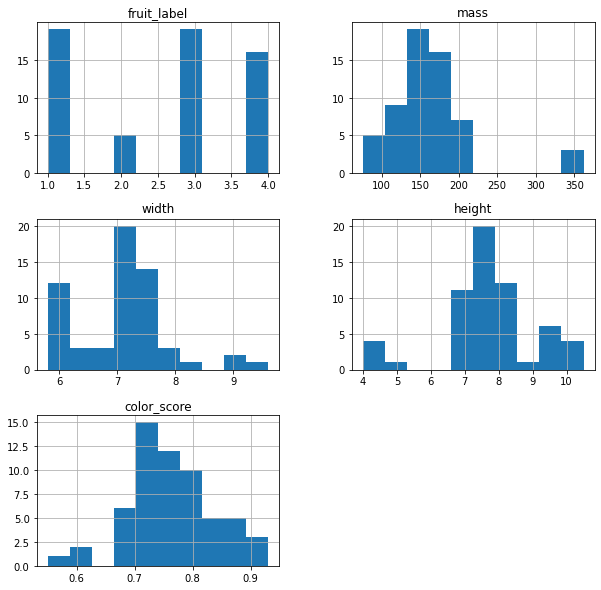

In [6]:
data.hist(figsize=(10,10))
plt.show()

### **Plots comparing different attributes** 

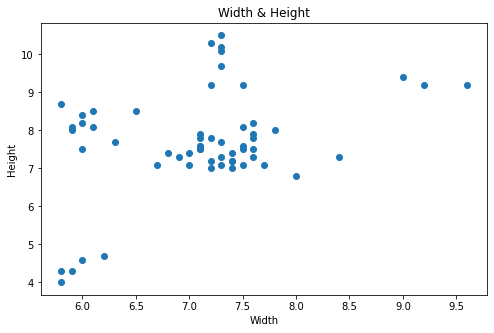

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(data['width'], data['height'])
plt.title('Width & Height')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

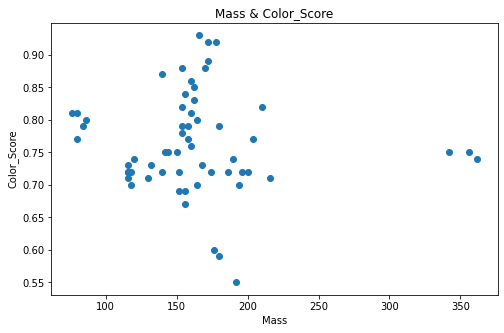

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(data['mass'], data['color_score'])
plt.title('Mass & Color_Score')
plt.xlabel('Mass')
plt.ylabel('Color_Score')
plt.show()

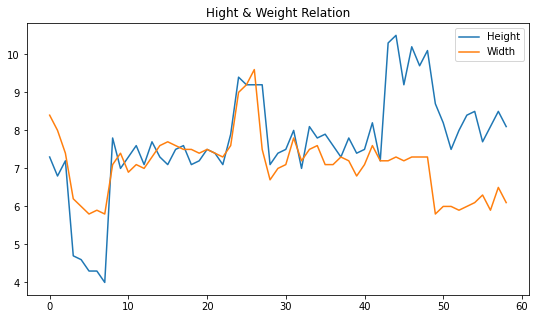

In [9]:
plt.figure(figsize=(9,5))
plt.plot(data['height'], label='Height')
plt.plot(data['width'], label='Width')
plt.title('Hight & Weight Relation')
plt.legend()
plt.show()

##### **Assigning Attributes to Variables**

In [10]:
X = data.iloc[:, 2:].values
y = data['fruit_label'].values

##### *Feature Scaling*

In [11]:
scaler = MMS()
X = scaler.fit_transform(X)

### **Splitting Dataset into Training and Test Sets** 

In [12]:
X_train, X_test, y_train, y_test = TTS(X, y, test_size = 0.3, random_state = 1234)

### **KNN Classifier Function**

In [13]:
def euclidean_distance(a, b):
        return np.sqrt(np.sum((a - b)**2))

class KNN:
    def __init__(self, k=5):
        self.k = k
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X):
        y_predict = [self._predict(x) for x in X]
        return np.array(y_predict)
    def _predict(self, x):
      import numpy as np
      distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
      k_index = np.argsort(distances)[:self.k]
      k_neighbor_labels = [self.y_train[i] for i in k_index]  
      most_common = Counter(k_neighbor_labels).most_common(1)
      return most_common[0][0]

##### ***To determine the Best k - value***

##### Elbow Method

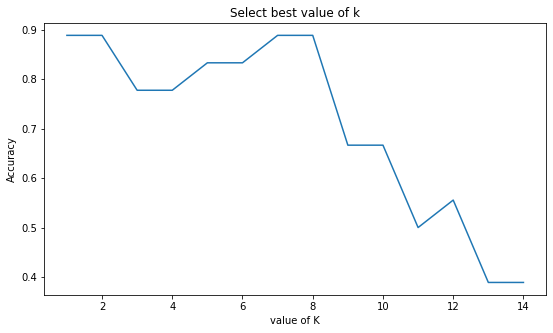

In [14]:
from sklearn.neighbors import KNeighborsClassifier
k = range(1,15)
total_acc = []

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    acc = knn.score(X_test,y_test)
    total_acc.append(acc)

plt.figure(figsize=(9,5))
plt.xlabel("value of K")
plt.ylabel("Accuracy")
plt.title("Select best value of k")
plt.plot(k,total_acc)
plt.show()

Minimum error:- 0.1111111111111111 at K = 0


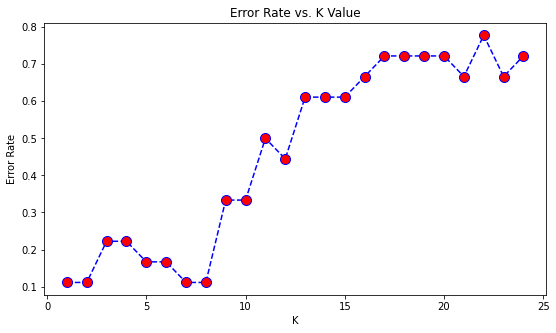

In [15]:
error_rate = []
for i in range(1,25):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(9, 5))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

### **Prediction using the Classifier**

In [16]:
k = 1
clf = KNN(k=k)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

##### Classification Report

In [17]:
def Accuracy(y_true, y_predict):
    accuracy = np.sum(y_true == y_predict) / len(y_true)
    return accuracy

def precision_score(y_test, y_predict):
    true_positives = len([a for a, p in zip(y_test, y_predict) if a == p and p == 1])
    false_positives = len([a for a, p in zip(y_test, y_predict) if a != p and p == 1])
    return true_positives / (true_positives + false_positives)

def f1_score(y_test,y_predict):
    return 2 * (precision_score(y_test, predictions) * recall_score(y_test, predictions)) / (precision_score(y_test, predictions) + recall_score(y_test, predictions))

def recall_score(actual, predicted):
    true_positives = len([a for a, p in zip(actual, predicted) if a == p and p == 1])
    false_negatives = len([a for a, p in zip(actual, predicted) if a != p and p == 0])
    return true_positives / (true_positives + false_negatives)

print("\nCLASSIFICATION REPORT")
print("\nAccuracy :", round(Accuracy(y_test, predictions), 2))
print("\nPrecision:", round(precision_score(y_test, predictions), 2))
print("\nF1 Score :", round(f1_score(y_test, predictions), 2))
print("\nRecall   :", round(recall_score(y_test, predictions), 2))


CLASSIFICATION REPORT

Accuracy : 0.89

Precision: 0.86

F1 Score : 0.92

Recall   : 1.0


##### Confusion Matrix

In [18]:
classes = set(y_test)
number_of_classes = len(classes)

conf_matrix = pd.DataFrame(
    np.zeros((number_of_classes, number_of_classes),dtype=int),
    index=classes,
    columns=classes)

for i, j in zip(y_test, predictions):
        conf_matrix.loc[i, j] += 1

print("CONFUSION MATRIX:\n\n", conf_matrix.values)

CONFUSION MATRIX:

 [[6 0 0 0]
 [0 2 0 0]
 [1 0 3 1]
 [0 0 0 5]]


### **Test Cases**

In [19]:
test_case_1 = clf.predict([[1.0,1.0,0.8,0.5]])
print('The Fruit is: ', pred[test_case_1[0]])

The Fruit is:  orange


In [20]:
test_case_2 = clf.predict([[0.0, 0.0, 0.0, 0.6]])
print('The Fruit is: ', pred[test_case_2[0]])

The Fruit is:  mandarin


In [21]:
test_case_3 = clf.predict([[0.4, 0.3, 0.9, 0.4]])
print('The Fruit is: ', pred[test_case_3[0]])

The Fruit is:  lemon
